In [1]:
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


## Erste Datenanalyse

* Jede Zeile unseres Datensatzes besteht aus einem String und boolean
* Analyse mit NumPy/Pandas nicht möglich
* Daher verwenden wir ein Bild eingelesen als array

In [2]:
image = Image.open('Data/PulledPork.jpg')

# Bild in ein NumPy-Array umwandeln
image_array = np.array(image)

In [3]:
spam_dataset = pd.read_csv('Data/spam_dataset.csv')
spam_dataset.head()

,message_content,is_spam
0,"Hello Lonnie,\n\nJust wanted to touch base reg...",0
1,"Congratulations, you've won a prize! Call us n...",1
2,You have been pre-approved for a credit card w...,1
3,"Limited time offer, act now! Only a few spots ...",1
4,Your loan has been approved! Transfer funds to...,1


In [4]:
r_channel_pixel_values = image_array[:, :, 0].flatten()
g_channel_pixel_values = image_array[:, :, 1].flatten()
b_channel_pixel_values = image_array[:, :, 2].flatten()

# Satische Analyse
* Sind die Daten homogen verteilt?
    * Nein, siehe Histogramm
* Gibt es Ausreißer?
    * Bei einem Schwellenwert ab 2.5 x Standardabweichung nicht
    * Bei einem Schwellenwert <= 2 x Standardabweichung ja (23892 Ausreißer bei 2)


In [5]:
# Statistische Analyse der Pixelwerte
mean_value = np.mean(r_channel_pixel_values)
median_value = np.median(r_channel_pixel_values)
std_dev = np.std(r_channel_pixel_values)

print(f"Mittelwert der Pixelwerte: {mean_value}")
print(f"Median der Pixelwerte: {median_value}")
print(f"Standardabweichung der Pixelwerte: {std_dev}")

# Schwellenwert für Ausreißer 
# (z.B. 3 Standardabweichungen vom Mittelwert entfernt)
upper_limit = mean_value + 2 * std_dev
lower_limit = mean_value - 2 * std_dev


outliers = np.sum((r_channel_pixel_values > upper_limit) | (r_channel_pixel_values < lower_limit))
print(f"Anzahl der Ausreißer: {outliers}")


Mittelwert der Pixelwerte: 105.629503125
Median der Pixelwerte: 100.0
Standardabweichung der Pixelwerte: 69.36882514398872
Anzahl der Ausreißer: 23892


## Kannst du durch die statistischen Werte schon irgenwelche Schlüsse aus deinen Daten ziehen?
   * Durch den Mittelwert der Farbkanäle erkennt man das die Pixel durchschnittlich eher Rötlich sind

In [6]:
r_channel_mean_value = np.mean(r_channel_pixel_values)
g_channel_mean_value = np.mean(g_channel_pixel_values)
b_channel_mean_value = np.mean(b_channel_pixel_values)

print(f"Mittelwert der Pixelwerte (R-Kanal): {r_channel_mean_value}")
print(f"Mittelwert der Pixelwerte (G-Kanal): {g_channel_mean_value}")
print(f"Mittelwert der Pixelwerte (B-Kanal): {b_channel_mean_value}")

Mittelwert der Pixelwerte (R-Kanal): 105.629503125
Mittelwert der Pixelwerte (G-Kanal): 95.24125833333333
Mittelwert der Pixelwerte (B-Kanal): 89.60549166666667


## Histogram der Pixelwerte (R-Kanal)

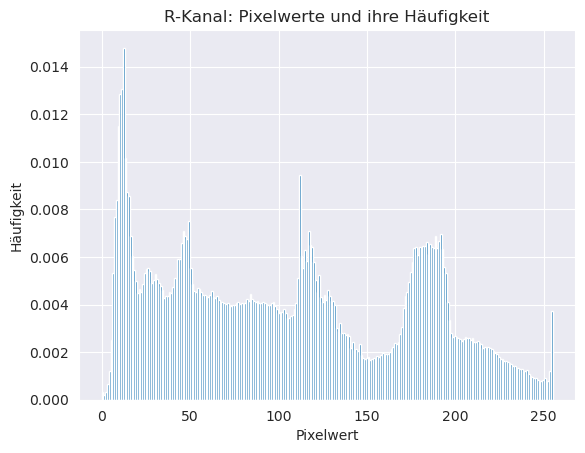

In [7]:
plt.hist(r_channel_pixel_values, bins=256, range=(0, 255), density=True)
plt.title('R-Kanal: Pixelwerte und ihre Häufigkeit')
plt.xlabel('Pixelwert')
plt.ylabel('Häufigkeit')
plt.show()

# Suche dir eine Spalte zum Sortieren deiner Daten und gib die 3 höchsten und die drei niedrigsten Werte aus
* Höchste und niedrigste Pixelwerte
* Längste und Kürzeste Emails

In [8]:
sorted_pixels = np.sort(r_channel_pixel_values)

print(f"3 niedrigste Pixelwerte: {sorted_pixels[:3]}")
print(f"3 höchste Pixelwerte: {sorted_pixels[-3:]}")


3 niedrigste Pixelwerte: [0 0 0]
3 höchste Pixelwerte: [255 255 255]


In [9]:
lengths = spam_dataset['message_content'].apply(len).tolist()

sorted_lengths = sorted(lengths)

lowest_3 = sorted_lengths[:3]
highest_3 = sorted_lengths[-3:]

print(f"3 kürzeste Emails: {lowest_3}")
print(f"3 längste Emails: {highest_3}")

3 kürzeste Emails: [162, 162, 162]
3 längste Emails: [511, 511, 514]


Erstelle ein neues NumPy Array mit nur einer Spalte aus deinem Datensatz.

In [10]:
red_channel = image_array[:, :, 0]  # Roter Kanal

# Ausgabe der ersten 5 Werte der neuen Spalte
print(red_channel[:5])

[[254 254 254 ...  30  28  26]
 [254 254 254 ...  32  30  28]
 [254 254 254 ...  34  32  31]
 [254 254 254 ...  35  33  32]
 [254 254 254 ...  42  41  38]]


## Unterschiede Numpy und Pandas
* Numpy ist für numerische Berechnungen optimiert
* Pandas ist für Datenanalyse optimiert
* Numpy ist schneller als Pandas
* Numpy ist besser für mathematische Operationen
* Pandas ist besser für Datenmanipulation
* Numpy ist besser für 1D Arrays

# Visualisierung


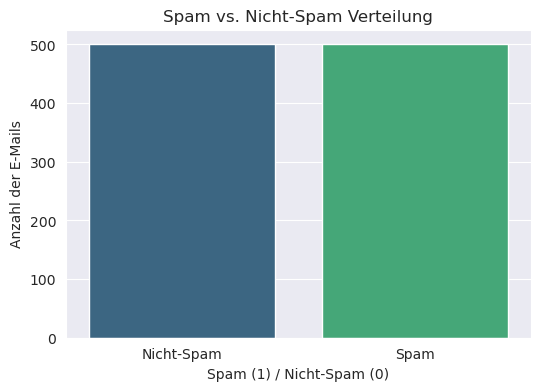

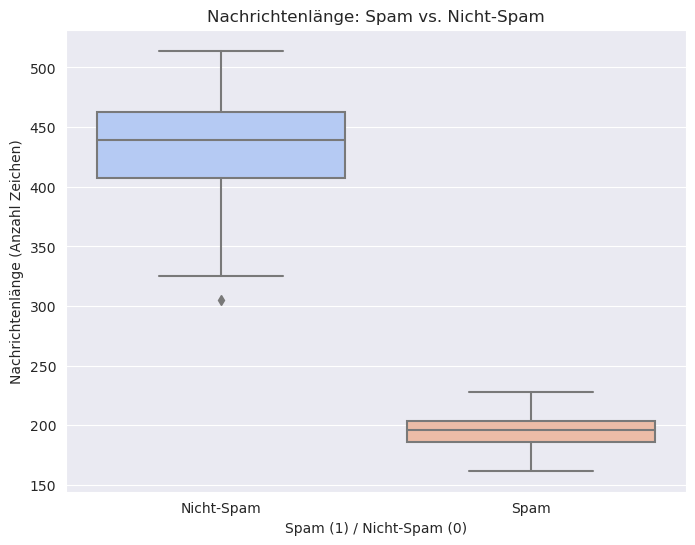

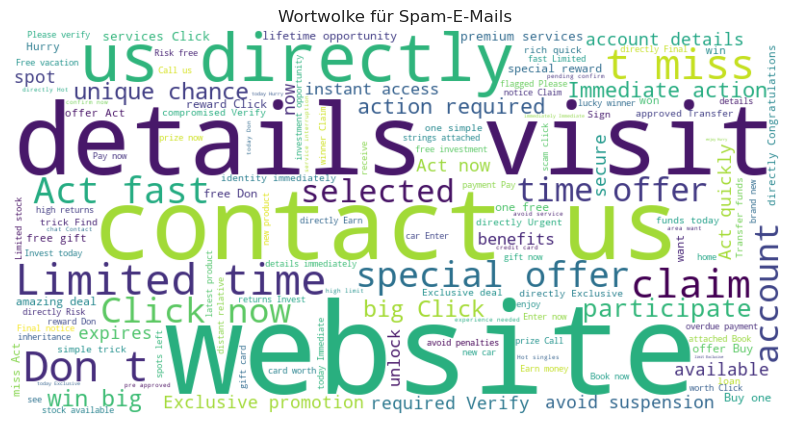

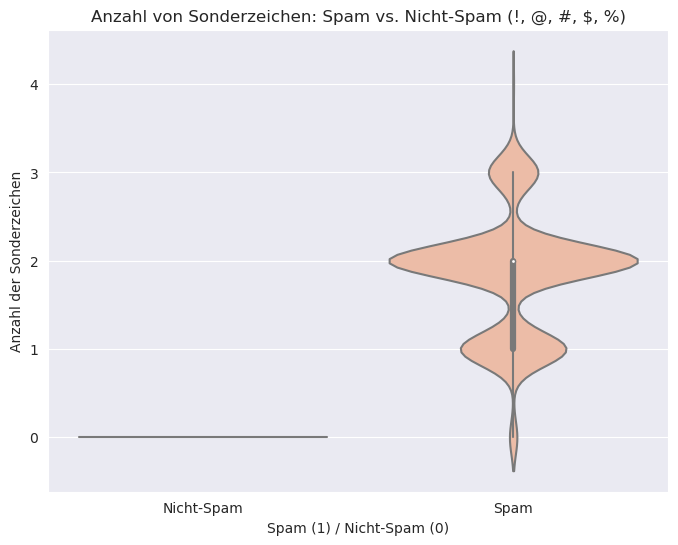

In [11]:
# Spam vs. Nicht-Spam Verteilung
spam_counts = spam_dataset['is_spam'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=spam_counts.index, y=spam_counts.values, palette='viridis')
plt.title('Spam vs. Nicht-Spam Verteilung')
plt.xlabel('Spam (1) / Nicht-Spam (0)')
plt.ylabel('Anzahl der E-Mails')
plt.xticks([0, 1], ['Nicht-Spam', 'Spam'])
plt.show()

# Durchschnittliche Länge der E-Mails in Bezug auf Spam vs. Nicht-Spam
spam_dataset['message_length'] = spam_dataset['message_content'].apply(len)

plt.figure(figsize=(8, 6))
sns.boxplot(x='is_spam', y='message_length', data=spam_dataset, palette='coolwarm')
plt.title('Nachrichtenlänge: Spam vs. Nicht-Spam')
plt.xlabel('Spam (1) / Nicht-Spam (0)')
plt.ylabel('Nachrichtenlänge (Anzahl Zeichen)')
plt.xticks([0, 1], ['Nicht-Spam', 'Spam'])
plt.show()

# Wortwolke für Spam-E-Mails
spam_words = ' '.join(spam_dataset[spam_dataset['is_spam'] == 1]['message_content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wortwolke für Spam-E-Mails')
plt.show()

# Verteilung der Sonderzeichen in Spam vs. Nicht-Spam
spam_dataset['special_char_count'] = spam_dataset['message_content'].str.count(r'[!@#$%&]')

# Erstellen eines Violinplots
plt.figure(figsize=(8, 6))
sns.violinplot(x='is_spam', y='special_char_count', data=spam_dataset, palette='coolwarm')
plt.title('Anzahl von Sonderzeichen: Spam vs. Nicht-Spam (!, @, #, $, %)')
plt.xlabel('Spam (1) / Nicht-Spam (0)')
plt.ylabel('Anzahl der Sonderzeichen')
plt.xticks([0, 1], ['Nicht-Spam', 'Spam'])
plt.show()

 # Data Preperation

In [13]:
sleep_dataset = pd.read_csv('Data/student_sleep_patterns.csv')
sleep_dataset.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


In [34]:
duplikate = sleep_dataset[sleep_dataset.duplicated()]
if not duplikate.empty:
    print(f"Es gibt {duplikate.shape[0]} Duplikate im Datensatz.")
    print("Die Duplikate sind:")
    print(duplikate)
else:
    print("Es gibt keine Duplikate im Datensatz.")

Es gibt keine Duplikate im Datensatz.


Gibt es Daten die nicht relevant sind?

NAN Values verändern:

In [35]:
gender_mapping = {'Male': 1, 'Female': 2, 'Other': 3}
university_mapping = {'1st Year': 1, '2nd Year': 2, '3rd Year': 3, '4th Year': 4}
sleep_dataset['Gender'] = sleep_dataset['Gender'].map(gender_mapping)
sleep_dataset['University_Year'] = sleep_dataset['University_Year'].map(university_mapping)
sleep_dataset.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,3,2,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,1,1,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,1,4,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,3,4,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,1,4,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
